<a href="https://colab.research.google.com/github/Driyaannt/PCVK_Ganjil_2023/blob/main/2141720224_week9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

In [20]:
img_dilation = cv2.imread('c', 0)

In [21]:
def image_dilation(F, w):
	# F: input image
	# w: structuring element
	# return: dilated output image
	p, q = F.shape

	output_image = np.zeros((p,q), dtype=np.uint8)

	# Generate SED
	SED = np.ones((w,w), dtype=np.uint8)
	c = int((w-1)/2)

	# Dilation
	for i in range(c, p-c):
		for j in range(c, q-c):
			temp = F[i-c:i+c+1, j-c:j+c+1]
			product = temp * SED
			output_image[i,j] = np.max(product)

	return output_image


In [22]:
def showCompImage(img1,img2,title):
  plt.figure(figsize=(12, 6))
  plt.subplot(1, 2, 1)
  plt.title(f"Original Image")
  plt.imshow(img1,cmap="gray")
  plt.axis('off')  # Sembunyikan sumbu gambar
  plt.subplot(1, 2, 2)
  plt.title(f"{title}")
  plt.imshow(img2,cmap="gray")
  plt.axis('off')  # Sembunyikan sumbu gambar
  plt.show()

<ipython-input-23-c46d24b5ab49>:13: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(131),plt.imshow(gamma_image,cmap = 'gray')


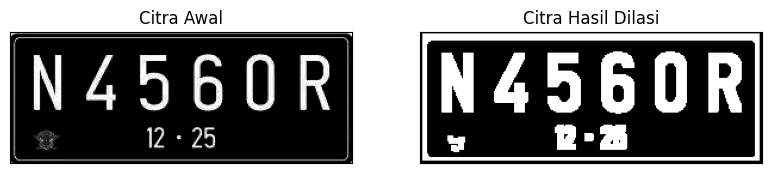

In [23]:
img_dilation = cv2.imread('/content/drive/MyDrive/images/week9/plat_nomer.jpg', 0)
gamma_image = np.zeros(img_dilation.shape, dtype=np.uint8)

for y in range(img_dilation.shape[0]):
	for x in range(img_dilation.shape[1]):
		gamma_image[y,x] = np.clip(255.0 * (img_dilation[y,x]/255.0) ** (2/1), 0, 255)

ret, thresh = cv2.threshold(gamma_image, 125,200,cv2.THRESH_BINARY)
w=5
output_image = image_dilation(thresh,w)

plt.subplots(figsize=(15, 5))
plt.subplot(131),plt.imshow(gamma_image,cmap = 'gray')
plt.title('Citra Awal'),plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(output_image,cmap = 'gray')
plt.title('Citra Hasil Dilasi'),plt.xticks([]), plt.yticks([])
plt.show()

[[0 1 0]
 [1 1 1]
 [0 1 0]]


<ipython-input-24-7e2b2bb04862>:10: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(131),plt.imshow(gamma_image,cmap = 'gray')


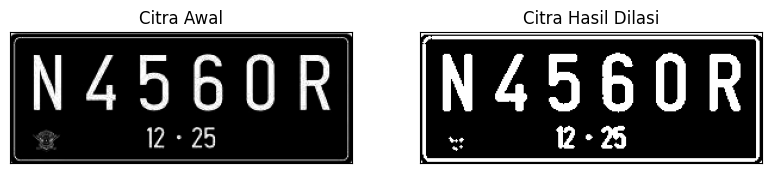

In [24]:
ret, thresh = cv2.threshold(gamma_image, 125,200,cv2.THRESH_BINARY)
kernel = np.array([[0,1,0],
                  [1,1,1],
                  [0,1,0]],np.uint8)
output_image = cv2.dilate(thresh,kernel,iterations = 1)

print(kernel)

plt.subplots(figsize=(15, 5))
plt.subplot(131),plt.imshow(gamma_image,cmap = 'gray')
plt.title('Citra Awal'),plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(output_image,cmap = 'gray')
plt.title('Citra Hasil Dilasi'),plt.xticks([]), plt.yticks([])
plt.show()

In [29]:
def image_erotion(F, k):
	# F: input image
	# k: structuring element
	# return: eroded output image
	height, width = F.shape

	output_image = np.zeros((height, width), dtype=np.uint8)

	# Generate SEE
	SEE = np.ones((k,k), dtype=np.uint8)
	c = int((k-1)/2)

	# Erosion
	for i in range(c, height-c):
		for j in range(c, width-c):
			temp = F[i-c:i+c+1, j-c:j+c+1]
			product = temp * SEE
			output_image[i,j] = np.min(product)

	return output_image


<ipython-input-31-d81dfd4166ff>:13: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(131),plt.imshow(gamma_image,cmap = 'gray')


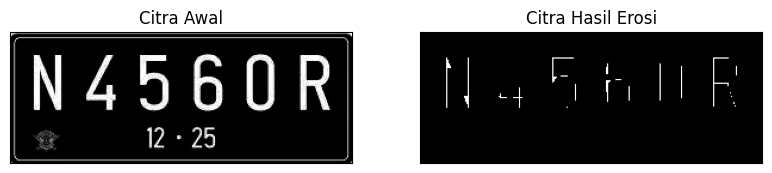

In [31]:
img_erotion = cv2.imread('/content/drive/MyDrive/images/week9/plat_nomer.jpg', 0)
gamma_image = np.zeros(img_erotion.shape, img_erotion.dtype)

for y in range(img_erotion.shape[0]):
	for x in range(img_erotion.shape[1]):
		gamma_image[y,x] = np.clip(255.0 * (img_erotion[y,x]/255.0) ** (2/1), 0, 255)

ret, thresh = cv2.threshold(gamma_image, 125,200,cv2.THRESH_BINARY)
k = 5
output_image = image_erotion(thresh,k)

plt.subplots(figsize=(15, 5))
plt.subplot(131),plt.imshow(gamma_image,cmap = 'gray')
plt.title('Citra Awal'),plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(output_image,cmap = 'gray')
plt.title('Citra Hasil Erosi'),plt.xticks([]), plt.yticks([])
plt.show()



[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]


<ipython-input-32-91fbe9d07983>:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(131),plt.imshow(gamma_image,cmap = 'gray')


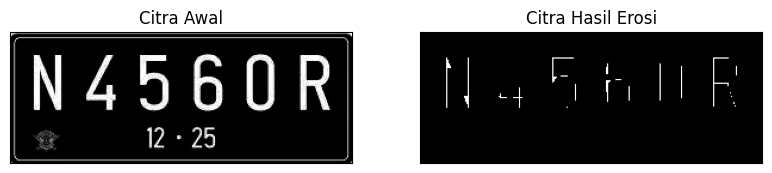

In [32]:
ret, thresh = cv2.threshold(gamma_image, 125,200,cv2.THRESH_BINARY)
kernel = np.ones((5,5),np.uint8)
output_image = cv2.erode(thresh,kernel,iterations = 1)

print(kernel)

plt.subplots(figsize=(15, 5))
plt.subplot(131),plt.imshow(gamma_image,cmap = 'gray')
plt.title('Citra Awal'),plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(output_image,cmap = 'gray')
plt.title('Citra Hasil Erosi'),plt.xticks([]), plt.yticks([])
plt.show()

In [33]:
def image_opening(F, w):
	# F: input image
	# w: structuring element
	# return: opened output image
	eroded_image = image_erotion(F, w)
	opened_image = image_dilation(eroded_image, w)
	return opened_image


<ipython-input-34-cf833bde2aa7>:13: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(131),plt.imshow(gamma_image,cmap = 'gray')


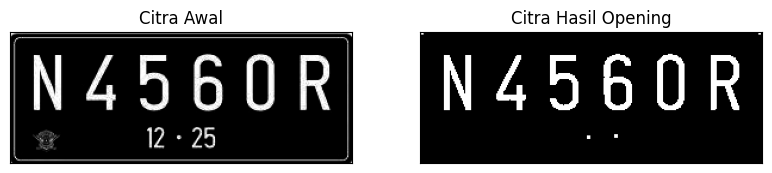

In [34]:
img_opening = cv2.imread('/content/drive/MyDrive/images/week9/plat_nomer.jpg', 0)
gamma_image = np.zeros(img_opening.shape, img_opening.dtype)

for y in range(img_opening.shape[0]):
	for x in range(img_opening.shape[1]):
		gamma_image[y,x] = np.clip(255.0 * (img_opening[y,x]/255.0) ** (2/1), 0, 255)

ret, thresh = cv2.threshold(gamma_image, 125,200,cv2.THRESH_BINARY)
w = 3
output_image = image_opening(thresh, w)

plt.subplots(figsize=(15, 5))
plt.subplot(131),plt.imshow(gamma_image,cmap = 'gray')
plt.title('Citra Awal'),plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(output_image,cmap = 'gray')
plt.title('Citra Hasil Opening'),plt.xticks([]), plt.yticks([])
plt.show()

<ipython-input-35-23e693e65513>:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(131),plt.imshow(gamma_image,cmap = 'gray')


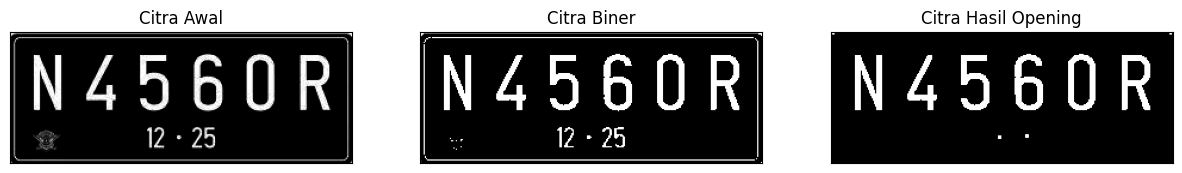

In [35]:
ret, thresh = cv2.threshold(gamma_image, 125,200,cv2.THRESH_BINARY)
w = 3
output_image = image_opening(thresh, w)

plt.subplots(figsize=(15, 5))
plt.subplot(131),plt.imshow(gamma_image,cmap = 'gray')
plt.title('Citra Awal'),plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(thresh,cmap = 'gray')
plt.title('Citra Biner'),plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(output_image,cmap = 'gray')
plt.title('Citra Hasil Opening'),plt.xticks([]), plt.yticks([])
plt.show()

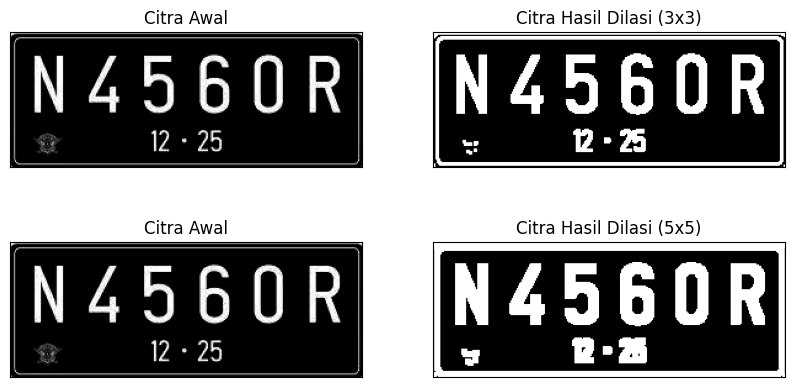

In [36]:
ret, thresh = cv2.threshold(gamma_image, 125,200,cv2.THRESH_BINARY)
kernel_3 = np.ones((3,3),np.uint8)
kernel_5 = np.ones((5,5),np.uint8)
output_image_3 = cv2.dilate(thresh,kernel_3,iterations = 1)
output_image_5 = cv2.dilate(thresh,kernel_5,iterations = 1)

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 5))

axs[0, 0].imshow(gamma_image, cmap='gray')
axs[0, 0].set_title('Citra Awal')
axs[0, 0].set_xticks([])
axs[0, 0].set_yticks([])

axs[0, 1].imshow(output_image_3, cmap='gray')
axs[0, 1].set_title('Citra Hasil Dilasi (3x3)')
axs[0, 1].set_xticks([])
axs[0, 1].set_yticks([])

axs[1, 0].imshow(gamma_image, cmap='gray')
axs[1, 0].set_title('Citra Awal')
axs[1, 0].set_xticks([])
axs[1, 0].set_yticks([])

axs[1, 1].imshow(output_image_5, cmap='gray')
axs[1, 1].set_title('Citra Hasil Dilasi (5x5)')
axs[1, 1].set_xticks([])
axs[1, 1].set_yticks([])

plt.show()

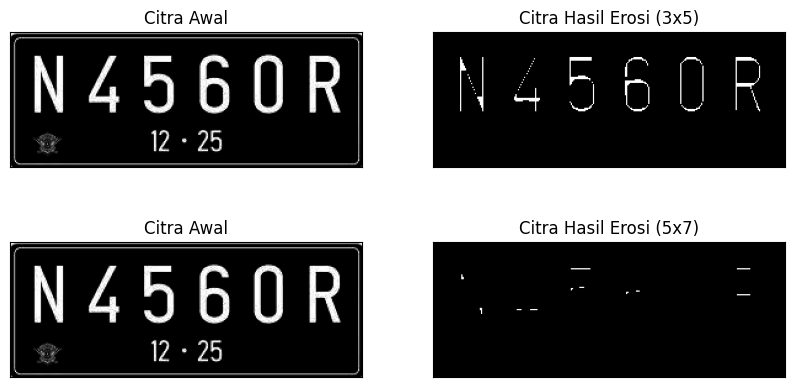

In [37]:
ret, thresh = cv2.threshold(gamma_image, 125,200,cv2.THRESH_BINARY)
kernel_3 = np.ones((3,5),np.uint8)
kernel_5 = np.ones((5,7),np.uint8)
output_image_3 = cv2.erode(thresh,kernel_3,iterations = 1)
output_image_5 = cv2.erode(thresh,kernel_5,iterations = 1)

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 5))

axs[0, 0].imshow(gamma_image, cmap='gray')
axs[0, 0].set_title('Citra Awal')
axs[0, 0].set_xticks([])
axs[0, 0].set_yticks([])

axs[0, 1].imshow(output_image_3, cmap='gray')
axs[0, 1].set_title('Citra Hasil Erosi (3x5)')
axs[0, 1].set_xticks([])
axs[0, 1].set_yticks([])

axs[1, 0].imshow(gamma_image, cmap='gray')
axs[1, 0].set_title('Citra Awal')
axs[1, 0].set_xticks([])
axs[1, 0].set_yticks([])

axs[1, 1].imshow(output_image_5, cmap='gray')
axs[1, 1].set_title('Citra Hasil Erosi (5x7)')
axs[1, 1].set_xticks([])
axs[1, 1].set_yticks([])

plt.show()

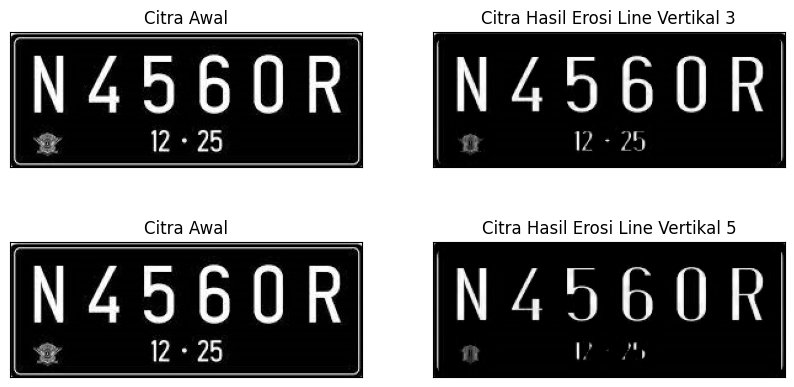

In [38]:
image = cv2.imread('/content/drive/MyDrive/images/week9/plat_nomer.jpg', 0)

vertical_line_3 = np.ones((3,1), dtype=np.uint8)
vertical_line_5 = np.ones((5,1), dtype=np.uint8)

eroded_img_3 = cv2.erode(image, vertical_line_3, iterations=1)
eroded_img_5 = cv2.erode(image, vertical_line_5, iterations=1)

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 5))

axs[0, 0].imshow(image, cmap='gray')
axs[0, 0].set_title('Citra Awal')
axs[0, 0].set_xticks([])
axs[0, 0].set_yticks([])

axs[0, 1].imshow(eroded_img_3, cmap='gray')
axs[0, 1].set_title('Citra Hasil Erosi Line Vertikal 3')
axs[0, 1].set_xticks([])
axs[0, 1].set_yticks([])

axs[1, 0].imshow(image, cmap='gray')
axs[1, 0].set_title('Citra Awal')
axs[1, 0].set_xticks([])
axs[1, 0].set_yticks([])

axs[1, 1].imshow(eroded_img_5, cmap='gray')
axs[1, 1].set_title('Citra Hasil Erosi Line Vertikal 5')
axs[1, 1].set_xticks([])
axs[1, 1].set_yticks([])

plt.show()

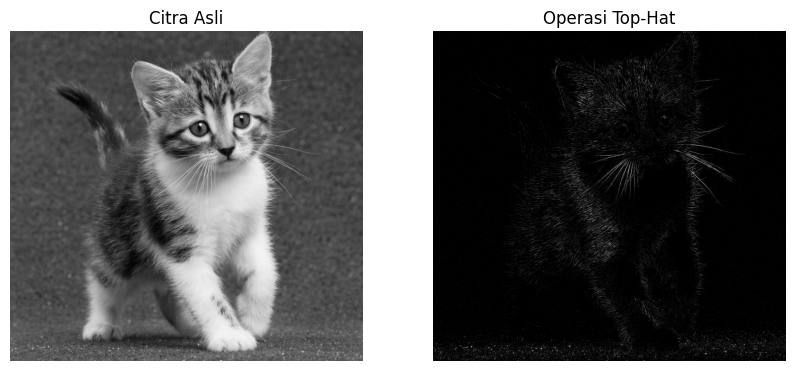

In [39]:
image = cv2.imread('/content/drive/MyDrive/images/week9/kitten01.jpg', cv2.IMREAD_GRAYSCALE)

se = np.ones((3, 3), dtype=np.uint8)

opened_image = cv2.morphologyEx(image, cv2.MORPH_OPEN, se)

tophat_image = cv2.subtract(image, opened_image)
plt.figure(figsize=(10,10))

plt.subplot(121), plt.imshow(cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)), plt.title('Citra Asli')
plt.axis('off')
plt.subplot(122), plt.imshow(tophat_image, cmap='gray'), plt.title('Operasi Top-Hat')
plt.axis('off')

plt.show()

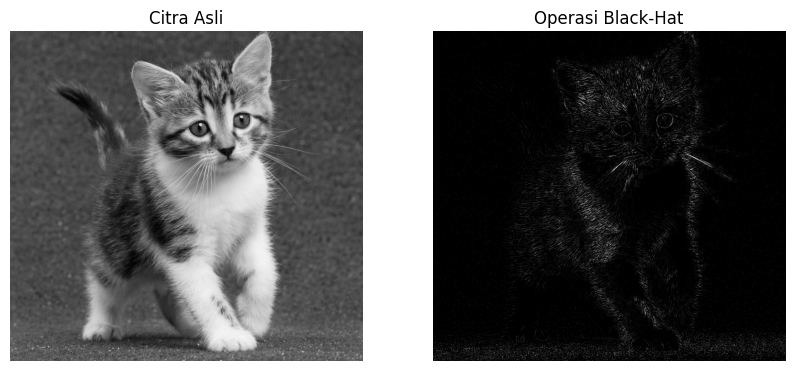

In [42]:
image = cv2.imread('/content/drive/MyDrive/images/week9/kitten01.jpg', cv2.IMREAD_GRAYSCALE)

se = np.ones((3, 3), dtype=np.uint8)

closed_image = cv2.morphologyEx(image, cv2.MORPH_CLOSE, se)

blackhat_image = cv2.subtract(closed_image, image)

plt.figure(figsize=(10,10))

plt.subplot(121), plt.imshow(cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)), plt.title('Citra Asli')
plt.axis('off')
plt.subplot(122), plt.imshow(blackhat_image, cmap='gray'), plt.title('Operasi Black-Hat')
plt.axis('off')

plt.show()

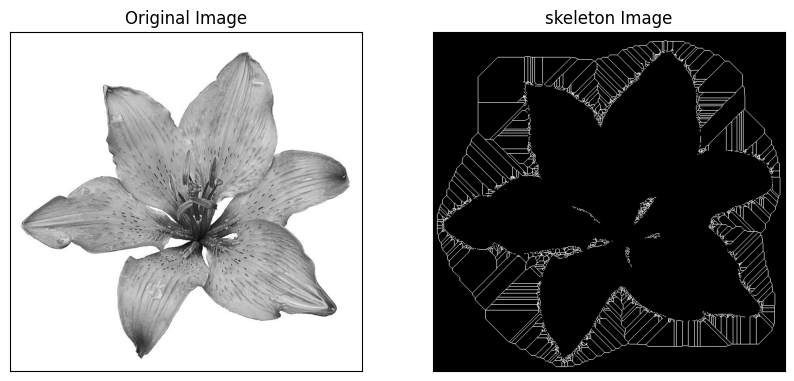

In [45]:
from skimage import filters
from skimage.morphology import skeletonize

image = cv2.imread('/content/drive/MyDrive/images/week9/lily.jpg', cv2.IMREAD_GRAYSCALE)

binary = image > filters.threshold_triangle(image)

binary_cp = binary.copy()
binary_cp[binary_cp == True] = 1
binary_cp[binary_cp == False] = 0

skeleton = skeletonize(binary_cp)

plt.figure(figsize=(10,10))

plt.subplot(121),plt.imshow(image,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

plt.subplot(122),plt.imshow(skeleton,cmap = 'gray')
plt.title('skeleton Image'), plt.xticks([]), plt.yticks([])

plt.show()

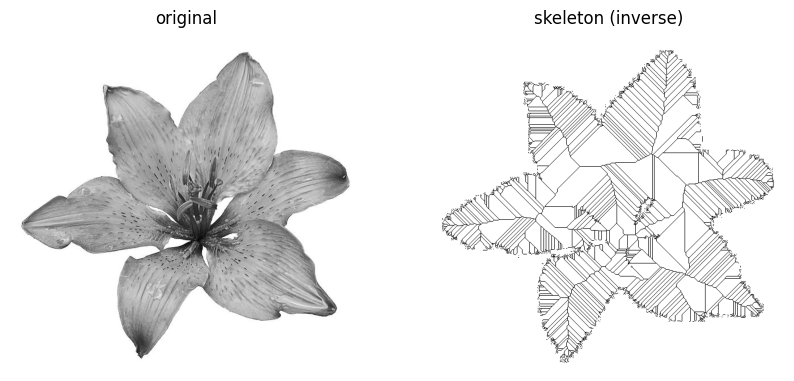

In [46]:
image = cv2.imread('/content/drive/MyDrive/images/week9/lily.jpg', cv2.IMREAD_GRAYSCALE)

binary = image < filters.threshold_triangle(image)

binary_cp = binary.copy()
binary_cp[binary_cp == True] = 1
binary_cp[binary_cp == False] = 0

skeleton = skeletonize(binary_cp)

fig, ax = plt.subplots(1, 2, figsize=(10, 10))

ax[0].imshow(image, cmap='gray')
ax[0].set_title('original')
ax[0].set_axis_off()

ax[1].imshow(skeleton, cmap='gray_r')
ax[1].set_title('skeleton (inverse)')
ax[1].set_axis_off()
plt.show()

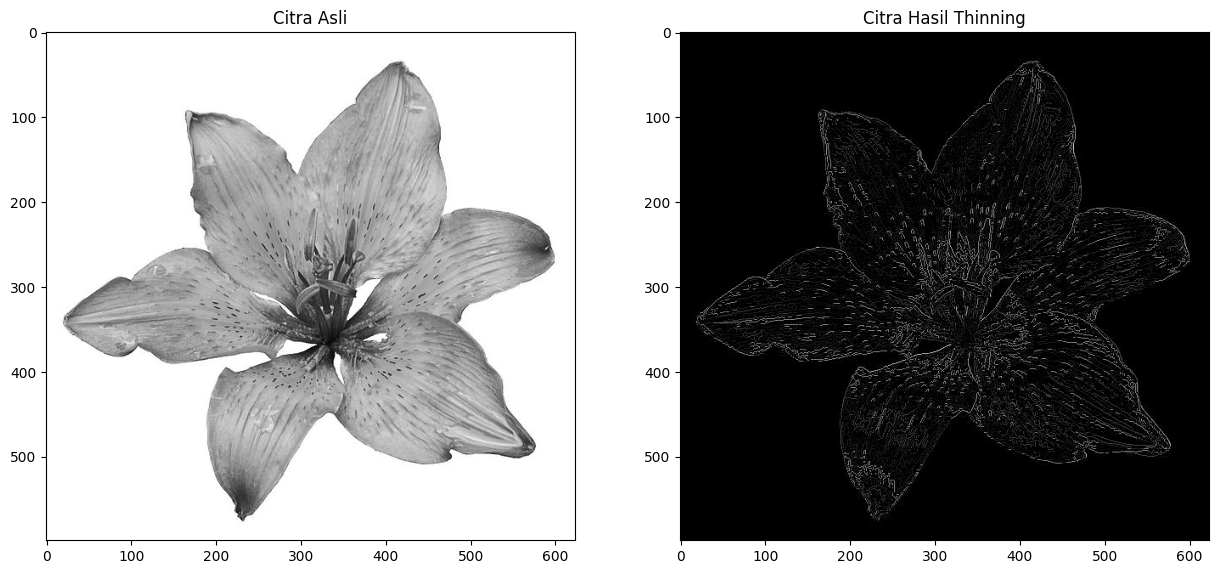

In [47]:
image = cv2.imread('/content/drive/MyDrive/images/week9/lily.jpg', cv2.IMREAD_GRAYSCALE)

def thinning(image):
    def thinning_step(image, mask):
        eroded = cv2.erode(image, mask)
        return cv2.bitwise_and(image, cv2.bitwise_not(eroded))

    B1 = np.array([[0, 0, 0],
                   [0, 1, 0],
                   [1, 1, 1]], dtype=np.uint8)
    B2 = np.array([[0, 0, 0],
                   [0, 1, 1],
                   [0, 1, 0]], dtype=np.uint8)
    B3 = np.array([[0, 0, 1],
                   [0, 1, 1],
                   [0, 0, 1]], dtype=np.uint8)
    B4 = np.array([[0, 1, 0],
                   [0, 1, 1],
                   [0, 0, 0]], dtype=np.uint8)

    while True:
        temp_image = image.copy()
        for mask in [B1, B2, B3, B4]:
            image = thinning_step(image, mask)
        if np.array_equal(image, temp_image):
            break

    return image

thinned_image = thinning(image)
plt.figure(figsize=(15,15))

plt.subplot(121)
plt.imshow(image, cmap='gray')
plt.title('Citra Asli')

plt.subplot(122)
plt.imshow(thinned_image, cmap='gray')
plt.title('Citra Hasil Thinning')

plt.show()

#Tugas Praktikum
Tugas Praktikum Morfologi melibatkan implementasi dataset KTP yang terdapat dalam
Modul 7. Dalam tugas ini, kita akan menggunakan semua informasi yang disediakan dalam
modul Morfologi dan menerapkan sejumlah nilai tambahan dalam kode sumber. Tujuannya
adalah agar citra KTP dapat terbaca dengan baik ketika teknik morfologi diterapkan pada citra
tersebut.

# KTP 1

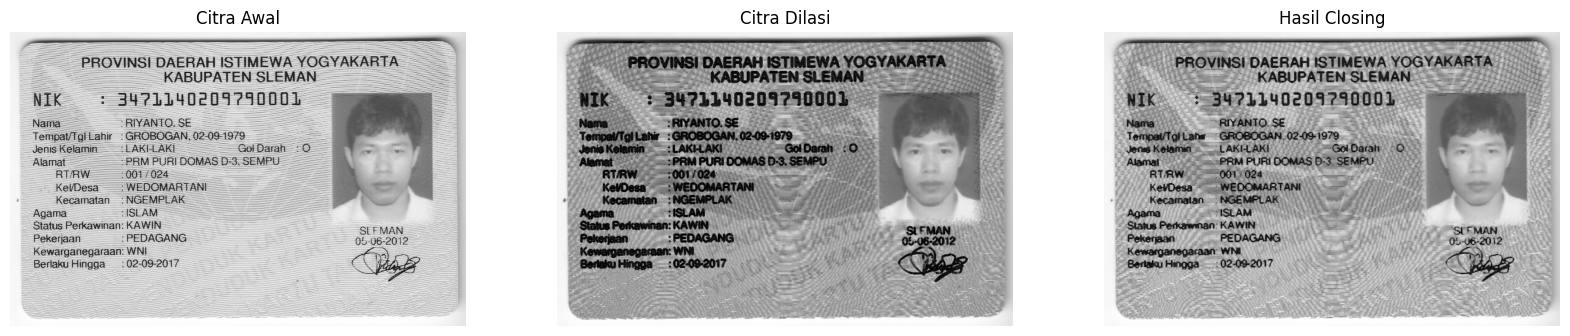

In [51]:
def inverse(img):
  return 255 - img

ktp1 = cv2.imread('/content/drive/MyDrive/images/week9/ktp.png', cv2.IMREAD_GRAYSCALE)

dilasi_kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (5,5))
inverse_img = inverse(ktp1)

dilated_image = cv2.dilate(inverse_img, dilasi_kernel, iterations=1)
erosi_kernel = np.ones((3, 3), dtype=np.uint8)

closed_image = cv2.erode(dilated_image, erosi_kernel, iterations=1)

ktp1_rgb = cv2.cvtColor(ktp1, cv2.COLOR_GRAY2RGB)
dilated_rgb = cv2.cvtColor(inverse(dilated_image), cv2.COLOR_GRAY2RGB)
closed_rgb = cv2.cvtColor(inverse(closed_image), cv2.COLOR_GRAY2RGB)

plt.figure(figsize=(20,20))

# cv2_imshow(closed_image)
plt.subplot(131), plt.imshow(ktp1_rgb), plt.title('Citra Awal')
plt.axis('off')
plt.subplot(132), plt.imshow(dilated_rgb), plt.title('Citra Dilasi')
plt.axis('off')
plt.subplot(133), plt.imshow(closed_rgb), plt.title('Hasil Closing')
plt.axis('off')

plt.show()


# KTP 2

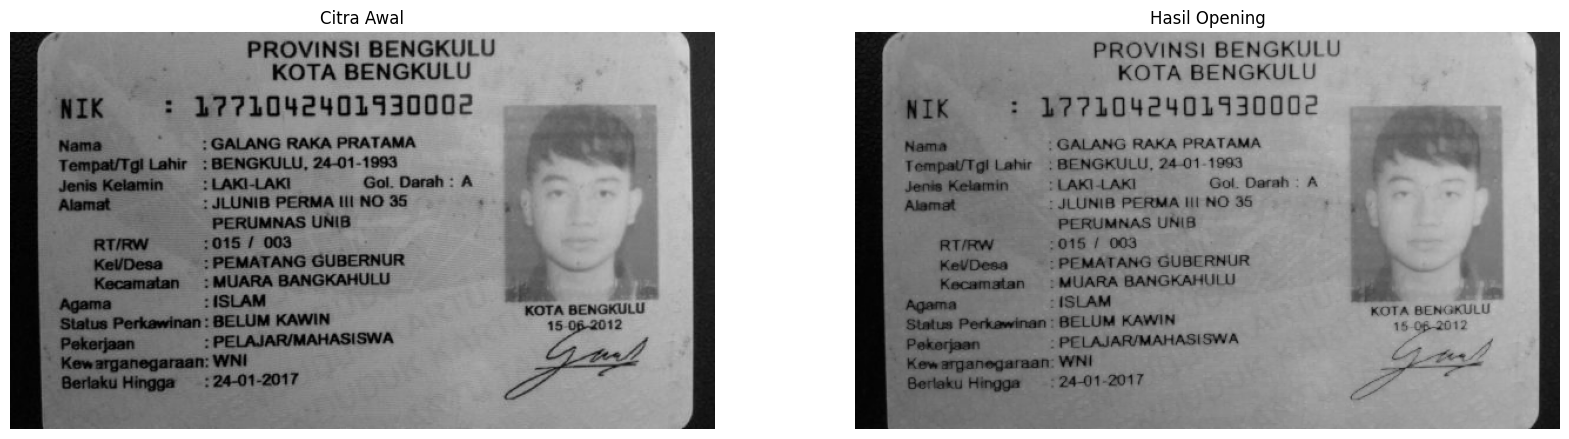

In [55]:
def inverse(img):
  return 255 - img

ktp2 = cv2.imread('/content/drive/MyDrive/images/week9/ktp1.png', cv2.IMREAD_GRAYSCALE)

dilasi_kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (1,1))
erosi_kernel = np.ones((2, 2), dtype=np.uint8)

inverse_img = inverse(ktp2)

erosion_image = cv2.erode(inverse_img, erosi_kernel, iterations=1)
dilated_image = cv2.dilate(erosion_image, dilasi_kernel, iterations=1)


ktp2_rgb = cv2.cvtColor(ktp2, cv2.COLOR_GRAY2RGB)
errosion_rgb = cv2.cvtColor(inverse(erosion_image), cv2.COLOR_GRAY2RGB)
dilated_rgb = cv2.cvtColor(inverse(dilated_image), cv2.COLOR_GRAY2RGB)

plt.figure(figsize=(20,20))

# cv2_imshow(closed_image)
plt.subplot(121), plt.imshow(ktp2_rgb), plt.title('Citra Awal')
plt.axis('off')
plt.subplot(122), plt.imshow(dilated_rgb), plt.title('Hasil Opening')
plt.axis('off')

plt.show()

#KTP 3

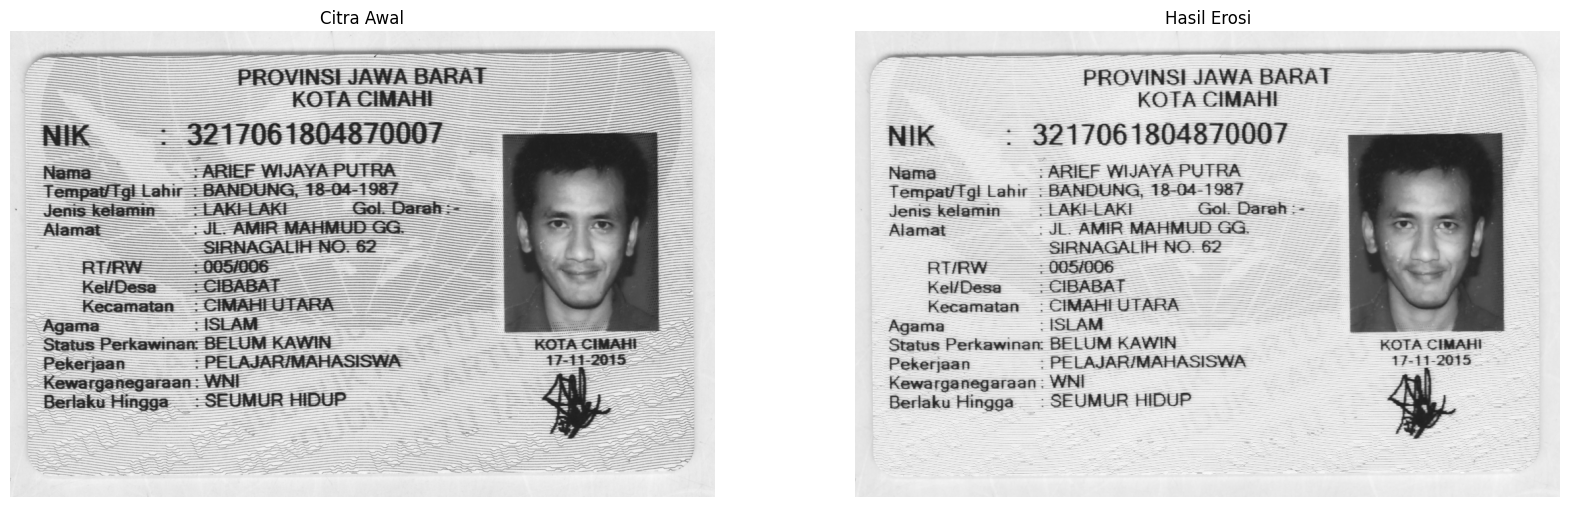

In [59]:
def inverse(img):
  return 255 - img

ktp3 = cv2.imread('/content/drive/MyDrive/images/week9/ktp2.png', cv2.IMREAD_GRAYSCALE)

erosi_kernel = np.ones((2, 2), dtype=np.uint8)

inverse_img = inverse(ktp3)

erosion_image = cv2.erode(inverse_img, erosi_kernel, iterations=1)

ktp3_rgb = cv2.cvtColor(ktp3, cv2.COLOR_GRAY2RGB)
errosion_rgb = cv2.cvtColor(inverse(erosion_image), cv2.COLOR_GRAY2RGB)

plt.figure(figsize=(20,20))

plt.subplot(121), plt.imshow(ktp3_rgb), plt.title('Citra Awal')
plt.axis('off')
plt.subplot(122), plt.imshow(errosion_rgb), plt.title('Hasil Erosi')
plt.axis('off')

plt.show()

# KTP 4

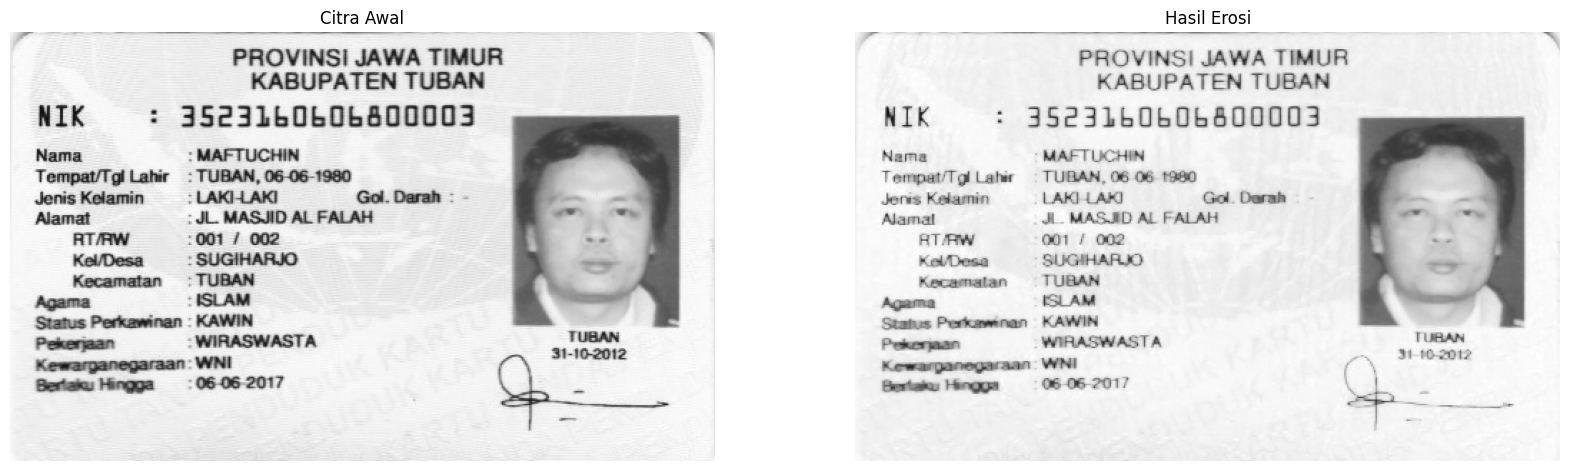

In [64]:
def inverse(img):
  return 255 - img

ktp4 = cv2.imread('/content/drive/MyDrive/images/week9/ktp3.png', cv2.IMREAD_GRAYSCALE)

erosi_kernel = np.ones((2, 2), dtype=np.uint8)

inverse_img = inverse(ktp4)

erosion_image = cv2.erode(inverse_img, erosi_kernel, iterations=1)

ktp4_rgb = cv2.cvtColor(ktp4, cv2.COLOR_GRAY2RGB)
errosion_rgb = cv2.cvtColor(inverse(erosion_image), cv2.COLOR_GRAY2RGB)

plt.figure(figsize=(20,20))

plt.subplot(121), plt.imshow(ktp4_rgb), plt.title('Citra Awal')
plt.axis('off')
plt.subplot(122), plt.imshow(errosion_rgb), plt.title('Hasil Erosi')
plt.axis('off')

plt.show()

# KTP 5

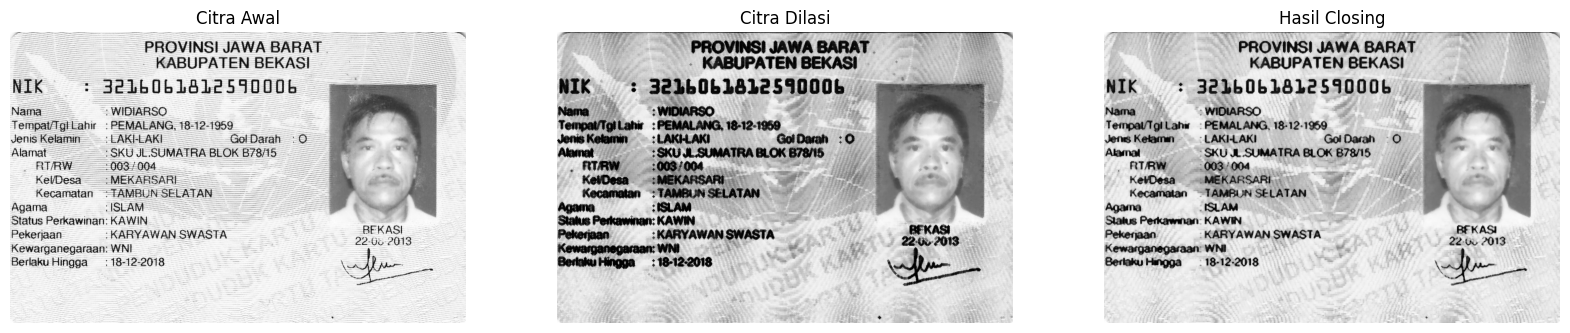

In [66]:
def inverse(img):
  return 255 - img

ktp5 = cv2.imread('/content/drive/MyDrive/images/week9/ktp6.png', cv2.IMREAD_GRAYSCALE)

dilasi_kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (5,5))
inverse_img = inverse(ktp5)

dilated_image = cv2.dilate(inverse_img, dilasi_kernel, iterations=1)
erosi_kernel = np.ones((3, 3), dtype=np.uint8)

closed_image = cv2.erode(dilated_image, erosi_kernel, iterations=1)

ktp5_rgb = cv2.cvtColor(ktp5, cv2.COLOR_GRAY2RGB)
dilated_rgb = cv2.cvtColor(inverse(dilated_image), cv2.COLOR_GRAY2RGB)
closed_rgb = cv2.cvtColor(inverse(closed_image), cv2.COLOR_GRAY2RGB)

plt.figure(figsize=(20,20))

plt.subplot(131), plt.imshow(ktp5_rgb), plt.title('Citra Awal')
plt.axis('off')
plt.subplot(132), plt.imshow(dilated_rgb), plt.title('Citra Dilasi')
plt.axis('off')
plt.subplot(133), plt.imshow(closed_rgb), plt.title('Hasil Closing')
plt.axis('off')

plt.show()

#KTP 6

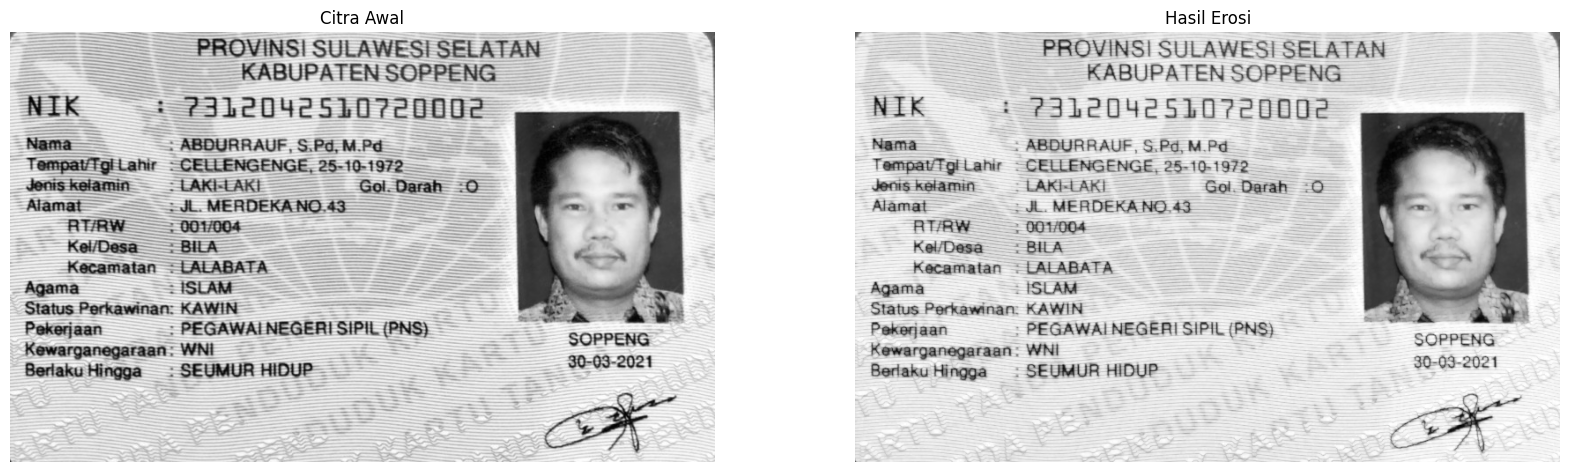

In [70]:
def inverse(img):
  return 255 - img

ktp4 = cv2.imread('/content/drive/MyDrive/images/week9/KTP7.jpeg', cv2.IMREAD_GRAYSCALE)

erosi_kernel = np.ones((2, 2), dtype=np.uint8)

inverse_img = inverse(ktp4)

erosion_image = cv2.erode(inverse_img, erosi_kernel, iterations=1)

ktp4_rgb = cv2.cvtColor(ktp4, cv2.COLOR_GRAY2RGB)
errosion_rgb = cv2.cvtColor(inverse(erosion_image), cv2.COLOR_GRAY2RGB)

plt.figure(figsize=(20,20))

plt.subplot(121), plt.imshow(ktp4_rgb), plt.title('Citra Awal')
plt.axis('off')
plt.subplot(122), plt.imshow(errosion_rgb), plt.title('Hasil Erosi')
plt.axis('off')

plt.show()